In [1]:
import pandas as pd

## 0. 데이터 가지고오기

In [98]:
bowling_m=pd.read_excel('bowling_ml.xlsx')
bowling_w=pd.read_excel('bowling_ml_w.xlsx')

In [99]:
bowling_m.head()

,Unnamed: 0,name,throws,team,height,exp,pro_exp,birth,weight,hand,ball_pound,TOT_AVG,CON_ST,L_READ,OVERCOME,SPARE_SUC
0,0,김진혁,크랭커,GRIP,180,23,3,1986-07-03,60,왼손,15.0,215.8,4.40,-9.000000,0.652252,0.811789
1,1,한재호,스트로커,퍼펙트코리아,173,22,3,1984-10-03,79,오른손,15.0,246.0,5.75,-9.750000,0.687281,0.659609
2,2,김홍기,크랭커,없음,179,13,4,1993-10-24,130,오른손,15.0,190.5,2.75,-9.250000,0.475010,0.542429
3,3,최성일,스트로커,트레이딩,175,10,8,1981-08-01,72,오른손,15.0,212.5,4.00,-8.750000,0.455561,0.768218
4,4,공병희,스트로커,Brunswick,167,31,6,1973-03-29,70,왼손,15.0,172.0,2.00,-8.666667,0.688754,0.467551


In [45]:
bowling_w.head()

,name,throws,team,height,exp,pro_exp,birth,weight,hand,ball_pound,TOT_AVG,CON_ST,L_READ,OVERCOME,SPARE_SUC
0,양은숙,스트로커,TEAM제이에스트레이딩㈜B,156,29,14,1964-09-03,53,오른손,15lbs,183,2,1,0.6,0.50
1,김효미,스트로커,TEAM STORM,166,22,7,1981-12-17,48,오른손,15lbs,225,3,2,1.0,0.75
2,정해원,크랭커,Brunswick,164,12,4,1998-03-17,68,왼손,15lbs,165,1,2,0.8,0.50
3,한진아14,크랭커,-,168,14,2,1998-02-24,63,오른손,14lbs,211,4,3,0.4,0.80
4,전성화,스트로커,Brunswick,166,16,13,1976-02-21,59,오른손,15lbs,203,6,4,0.4,0.40


---


## 1. 남성부 자료부터 수정

    - throws/ team / hand : 숫자로 변환

In [11]:
from sklearn.preprocessing import LabelEncoder 

In [100]:
bowling_m['throws'].unique()

array(['크랭커', '스트로커', '덤리스', '투핸드'], dtype=object)

In [101]:
le=LabelEncoder()
le.fit(bowling_m['throws']) #'크랭커', '스트로커', '덤리스', '투핸드'

LabelEncoder()

In [102]:
le.classes_

array(['덤리스', '스트로커', '크랭커', '투핸드'], dtype=object)

In [103]:
bowling_m['throws_num']= le.transform(bowling_m['throws'])  #'덤리스', '스트로커', '크랭커', '투핸드' = 0 ,1 ,2, 3 
bowling_m.tail(10)

,Unnamed: 0,name,throws,team,height,exp,pro_exp,birth,weight,hand,ball_pound,TOT_AVG,CON_ST,L_READ,OVERCOME,SPARE_SUC,throws_num
10,10,정연광,크랭커,없음,175,6,1,1994-05-23,94,오른손,15.0,213.000000,3.333333,-9.666667,0.634618,0.556406,2
11,11,정태화,크랭커,DSD,178,35,25,1967-02-28,72,오른손,16.0,223.500000,4.750000,-9.000000,0.549980,0.627932,2
12,12,박성진,덤리스,없음,170,15,6,1982-06-16,75,오른손,15.0,195.750000,3.000000,-8.000000,0.450006,0.686220,0
13,13,최원영,크랭커,미스틱브래그,175,26,13,1981-07-04,105,오른손,16.0,226.750000,5.250000,-10.000000,0.427389,0.821683,2
14,14,김정현,투핸드,핑거하우스,182,12,9,1978-07-31,80,오른손,15.0,211.666667,3.333333,-9.666667,0.722074,0.739415,3
15,15,김태건,스트로커,명인공조,174,18,4,1973-12-15,65,오른손,15.0,214.666667,3.666667,-8.000000,0.361171,0.794774,1
16,16,오규석,크랭커,sports,176,14,6,1990-09-11,75,오른손,15.0,211.666667,4.000000,-8.666667,0.336020,0.724279,2
17,17,정광희,크랭커,㈜진승,182,26,22,1971-06-03,72,오른손,16.0,249.333333,6.000000,-10.333333,0.755413,0.711982,2
18,18,정준오,크랭커,미스틱,173,8,3,1985-01-10,79,왼손,15.0,227.666667,3.666667,-8.666667,0.932628,0.722823,2
19,19,강민석,크랭커,엠케이트레이딩,175,9,7,1996-11-24,83,왼손,15.0,211.666667,3.666667,-10.000000,0.311959,0.793972,2


In [104]:
le=LabelEncoder()
le.fit(bowling_m['team'])

LabelEncoder()

In [105]:
le.classes_

array(['Brunswick', 'DSD', 'GRIP', 'Radical', 'sports', '㈜진승', '글로리아',
       '명인공조', '미스틱', '미스틱브래그', '없음', '엠케이트레이딩', '트레이딩', '퍼펙트코리아',
       '핑거하우스'], dtype=object)

In [106]:
bowling_m['team_num']= le.transform(bowling_m['team']) 
bowling_m.head()

,Unnamed: 0,name,throws,team,height,exp,pro_exp,birth,weight,hand,ball_pound,TOT_AVG,CON_ST,L_READ,OVERCOME,SPARE_SUC,throws_num,team_num
0,0,김진혁,크랭커,GRIP,180,23,3,1986-07-03,60,왼손,15.0,215.8,4.40,-9.000000,0.652252,0.811789,2,2
1,1,한재호,스트로커,퍼펙트코리아,173,22,3,1984-10-03,79,오른손,15.0,246.0,5.75,-9.750000,0.687281,0.659609,1,13
2,2,김홍기,크랭커,없음,179,13,4,1993-10-24,130,오른손,15.0,190.5,2.75,-9.250000,0.475010,0.542429,2,10
3,3,최성일,스트로커,트레이딩,175,10,8,1981-08-01,72,오른손,15.0,212.5,4.00,-8.750000,0.455561,0.768218,1,12
4,4,공병희,스트로커,Brunswick,167,31,6,1973-03-29,70,왼손,15.0,172.0,2.00,-8.666667,0.688754,0.467551,1,0


In [107]:
le=LabelEncoder()
le.fit(bowling_m['hand'])

LabelEncoder()

In [108]:
le.classes_

array(['오른손', '왼손'], dtype=object)

In [109]:
bowling_m['hand_num']= le.transform(bowling_m['hand'])  # '오른손', '왼손'= 0 ,1  
bowling_m.tail(10)

,Unnamed: 0,name,throws,team,height,exp,pro_exp,birth,weight,hand,ball_pound,TOT_AVG,CON_ST,L_READ,OVERCOME,SPARE_SUC,throws_num,team_num,hand_num
10,10,정연광,크랭커,없음,175,6,1,1994-05-23,94,오른손,15.0,213.000000,3.333333,-9.666667,0.634618,0.556406,2,10,0
11,11,정태화,크랭커,DSD,178,35,25,1967-02-28,72,오른손,16.0,223.500000,4.750000,-9.000000,0.549980,0.627932,2,1,0
12,12,박성진,덤리스,없음,170,15,6,1982-06-16,75,오른손,15.0,195.750000,3.000000,-8.000000,0.450006,0.686220,0,10,0
13,13,최원영,크랭커,미스틱브래그,175,26,13,1981-07-04,105,오른손,16.0,226.750000,5.250000,-10.000000,0.427389,0.821683,2,9,0
14,14,김정현,투핸드,핑거하우스,182,12,9,1978-07-31,80,오른손,15.0,211.666667,3.333333,-9.666667,0.722074,0.739415,3,14,0
15,15,김태건,스트로커,명인공조,174,18,4,1973-12-15,65,오른손,15.0,214.666667,3.666667,-8.000000,0.361171,0.794774,1,7,0
16,16,오규석,크랭커,sports,176,14,6,1990-09-11,75,오른손,15.0,211.666667,4.000000,-8.666667,0.336020,0.724279,2,4,0
17,17,정광희,크랭커,㈜진승,182,26,22,1971-06-03,72,오른손,16.0,249.333333,6.000000,-10.333333,0.755413,0.711982,2,5,0
18,18,정준오,크랭커,미스틱,173,8,3,1985-01-10,79,왼손,15.0,227.666667,3.666667,-8.666667,0.932628,0.722823,2,8,1
19,19,강민석,크랭커,엠케이트레이딩,175,9,7,1996-11-24,83,왼손,15.0,211.666667,3.666667,-10.000000,0.311959,0.793972,2,11,1


In [110]:
bowling_m.drop('throws',axis=1,inplace=True)
bowling_m.head()

,Unnamed: 0,name,team,height,exp,pro_exp,birth,weight,hand,ball_pound,TOT_AVG,CON_ST,L_READ,OVERCOME,SPARE_SUC,throws_num,team_num,hand_num
0,0,김진혁,GRIP,180,23,3,1986-07-03,60,왼손,15.0,215.8,4.40,-9.000000,0.652252,0.811789,2,2,1
1,1,한재호,퍼펙트코리아,173,22,3,1984-10-03,79,오른손,15.0,246.0,5.75,-9.750000,0.687281,0.659609,1,13,0
2,2,김홍기,없음,179,13,4,1993-10-24,130,오른손,15.0,190.5,2.75,-9.250000,0.475010,0.542429,2,10,0
3,3,최성일,트레이딩,175,10,8,1981-08-01,72,오른손,15.0,212.5,4.00,-8.750000,0.455561,0.768218,1,12,0
4,4,공병희,Brunswick,167,31,6,1973-03-29,70,왼손,15.0,172.0,2.00,-8.666667,0.688754,0.467551,1,0,1


In [111]:
bowling_m.drop('team',axis=1,inplace=True)
bowling_m.head()

,Unnamed: 0,name,height,exp,pro_exp,birth,weight,hand,ball_pound,TOT_AVG,CON_ST,L_READ,OVERCOME,SPARE_SUC,throws_num,team_num,hand_num
0,0,김진혁,180,23,3,1986-07-03,60,왼손,15.0,215.8,4.40,-9.000000,0.652252,0.811789,2,2,1
1,1,한재호,173,22,3,1984-10-03,79,오른손,15.0,246.0,5.75,-9.750000,0.687281,0.659609,1,13,0
2,2,김홍기,179,13,4,1993-10-24,130,오른손,15.0,190.5,2.75,-9.250000,0.475010,0.542429,2,10,0
3,3,최성일,175,10,8,1981-08-01,72,오른손,15.0,212.5,4.00,-8.750000,0.455561,0.768218,1,12,0
4,4,공병희,167,31,6,1973-03-29,70,왼손,15.0,172.0,2.00,-8.666667,0.688754,0.467551,1,0,1


In [112]:
bowling_m.drop('hand',axis=1,inplace=True)
bowling_m.head()

,Unnamed: 0,name,height,exp,pro_exp,birth,weight,ball_pound,TOT_AVG,CON_ST,L_READ,OVERCOME,SPARE_SUC,throws_num,team_num,hand_num
0,0,김진혁,180,23,3,1986-07-03,60,15.0,215.8,4.40,-9.000000,0.652252,0.811789,2,2,1
1,1,한재호,173,22,3,1984-10-03,79,15.0,246.0,5.75,-9.750000,0.687281,0.659609,1,13,0
2,2,김홍기,179,13,4,1993-10-24,130,15.0,190.5,2.75,-9.250000,0.475010,0.542429,2,10,0
3,3,최성일,175,10,8,1981-08-01,72,15.0,212.5,4.00,-8.750000,0.455561,0.768218,1,12,0
4,4,공병희,167,31,6,1973-03-29,70,15.0,172.0,2.00,-8.666667,0.688754,0.467551,1,0,1


---

## 2. 데이터 확인해보기


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 864x432 with 0 Axes>

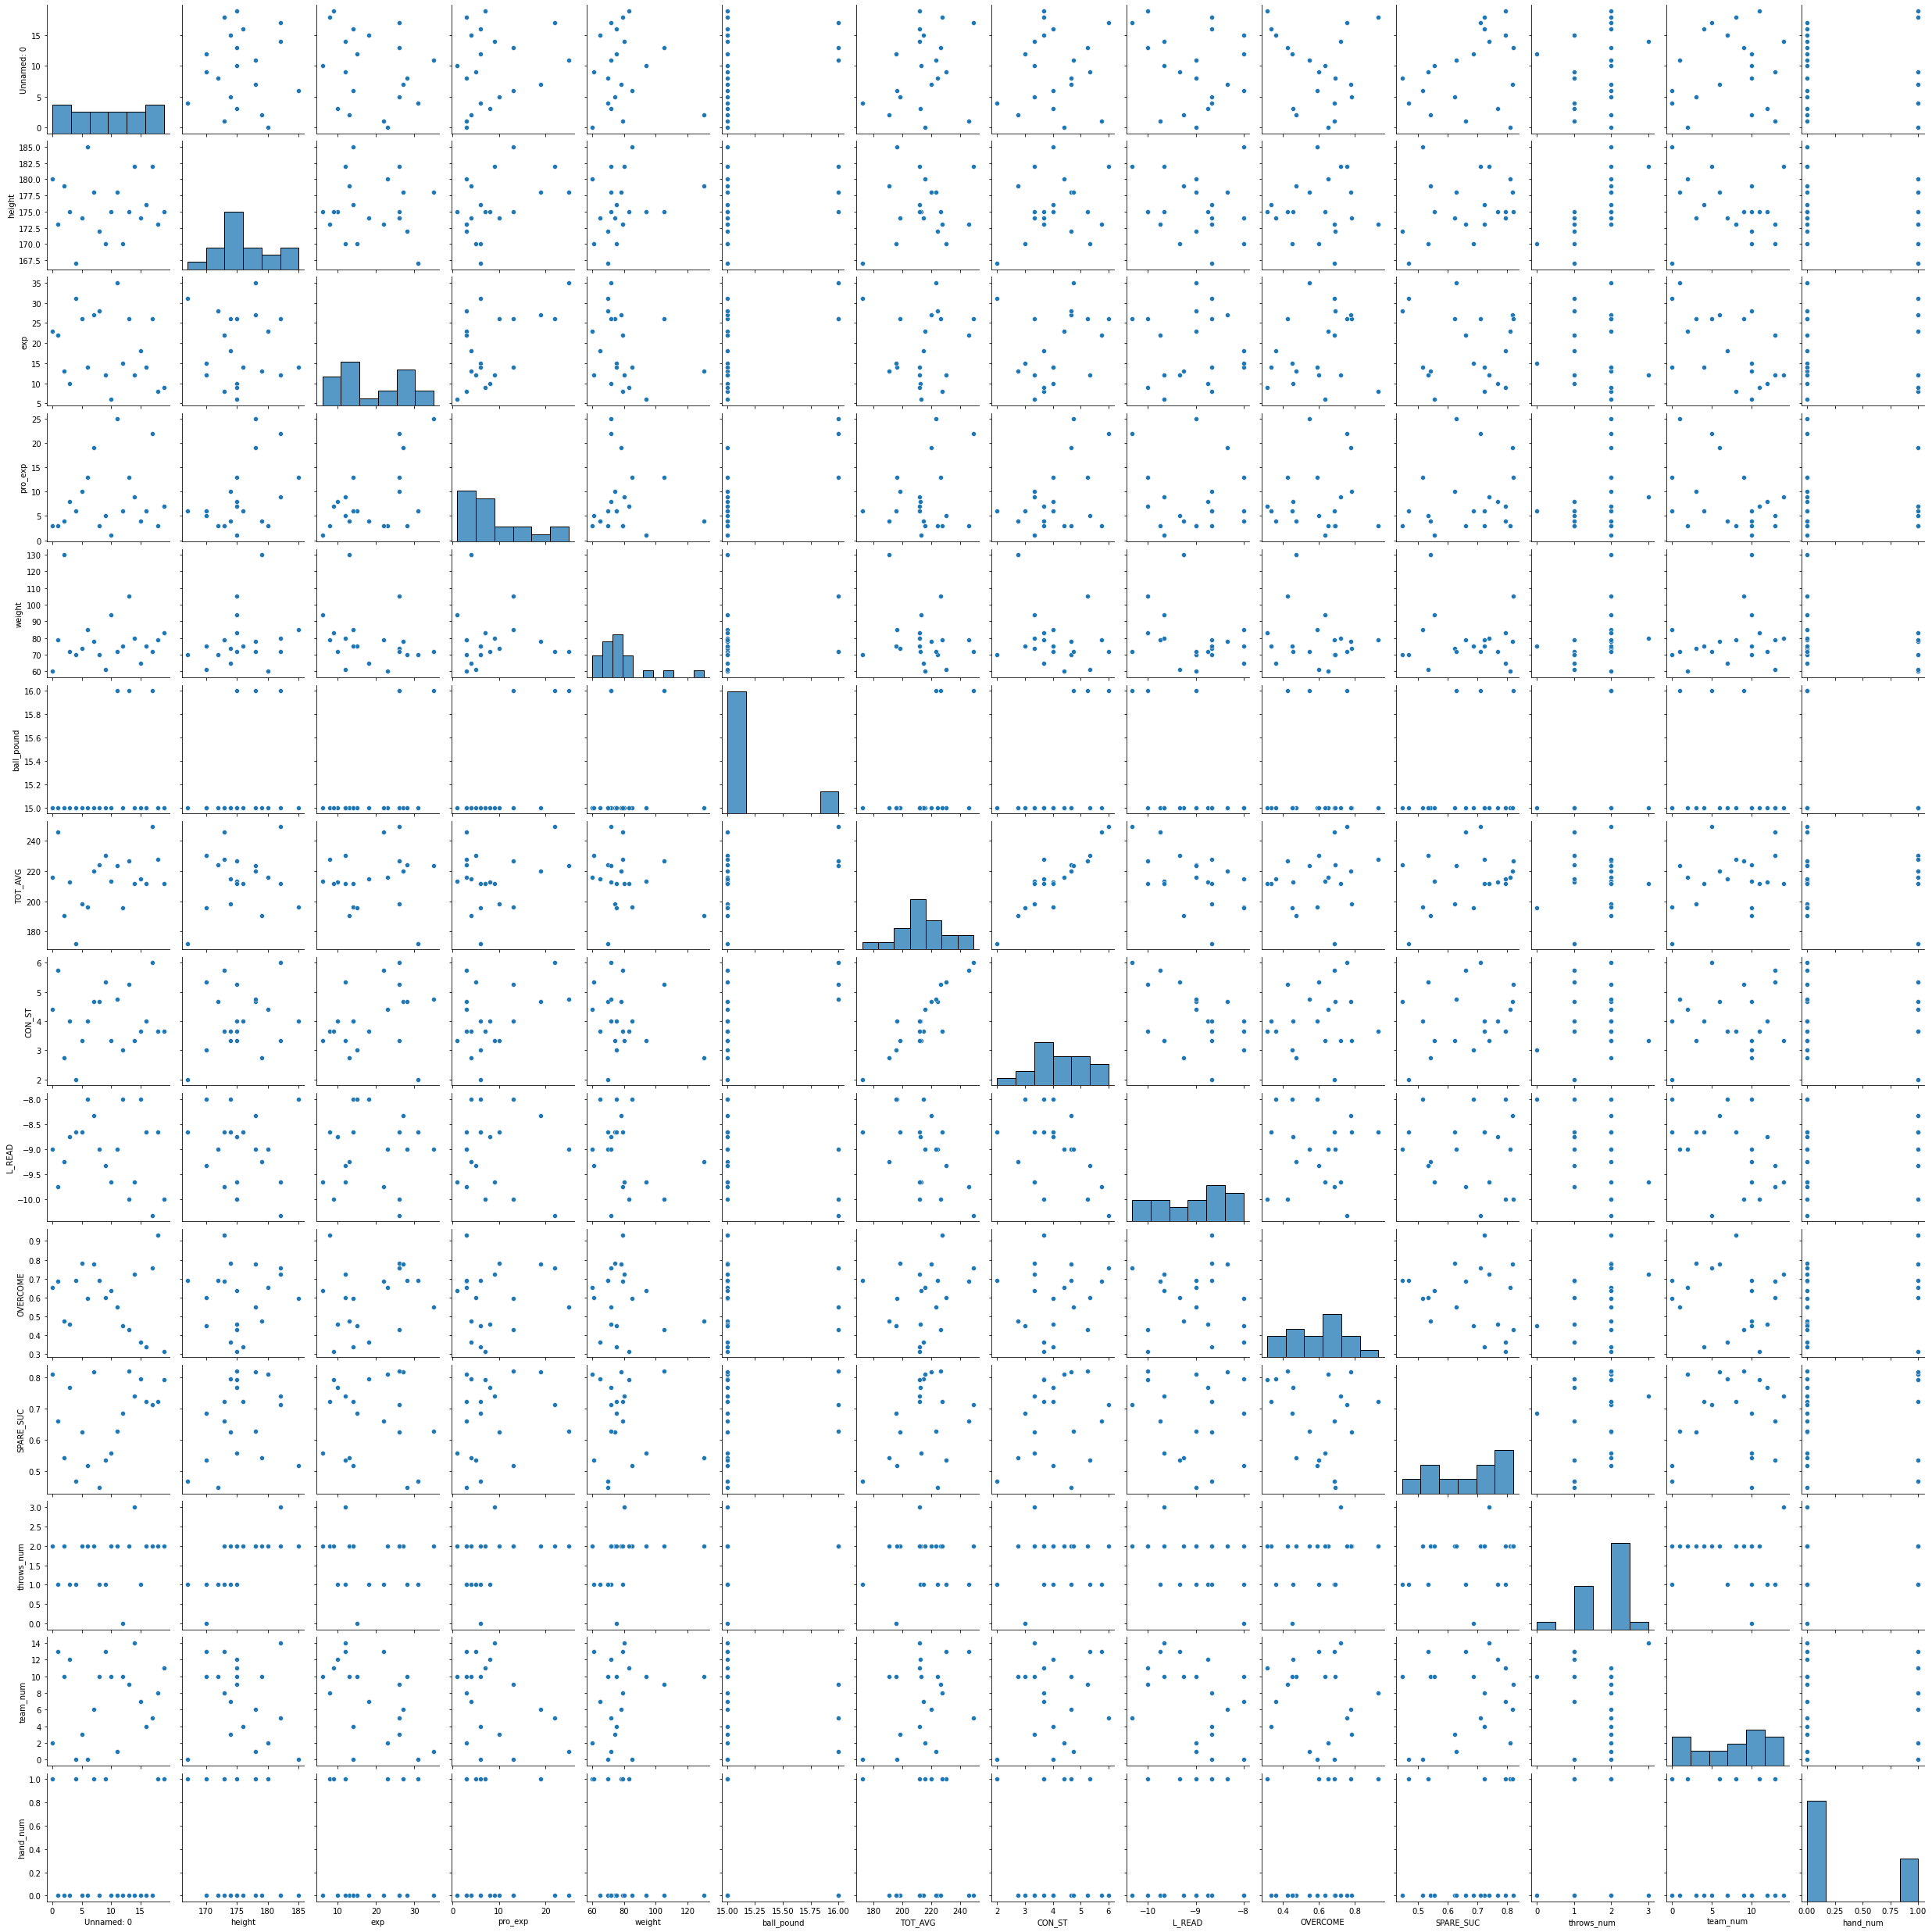

In [58]:
plt.figure(figsize=(12,6))
sns.pairplot(data=bowling_m);


 >> TOT_AVG 와 CON_ST


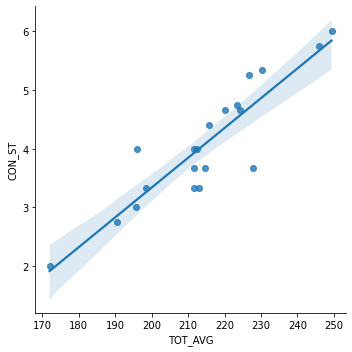

In [59]:
# 상관관계 확인

sns.lmplot(x='TOT_AVG', y= 'CON_ST', data=bowling_m);

>> 프로경력과 체중은?

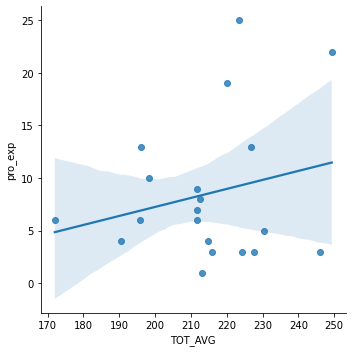

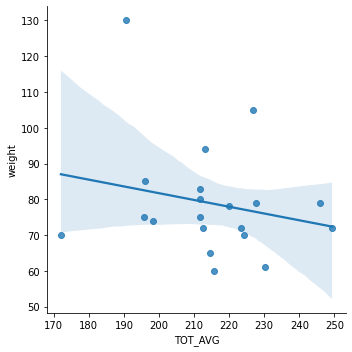

In [60]:
sns.lmplot(x='TOT_AVG', y= 'pro_exp', data=bowling_m);
sns.lmplot(x='TOT_AVG', y= 'weight', data=bowling_m);


    - 프로경력, 체중 모두 탈락..
    - CON_ST(연속 스트라이크 기록) 와 상관관계 높음

---

## 3. Decision Tree : 불필요!

In [113]:
bowling_m.head()

,Unnamed: 0,name,height,exp,pro_exp,birth,weight,ball_pound,TOT_AVG,CON_ST,L_READ,OVERCOME,SPARE_SUC,throws_num,team_num,hand_num
0,0,김진혁,180,23,3,1986-07-03,60,15.0,215.8,4.40,-9.000000,0.652252,0.811789,2,2,1
1,1,한재호,173,22,3,1984-10-03,79,15.0,246.0,5.75,-9.750000,0.687281,0.659609,1,13,0
2,2,김홍기,179,13,4,1993-10-24,130,15.0,190.5,2.75,-9.250000,0.475010,0.542429,2,10,0
3,3,최성일,175,10,8,1981-08-01,72,15.0,212.5,4.00,-8.750000,0.455561,0.768218,1,12,0
4,4,공병희,167,31,6,1973-03-29,70,15.0,172.0,2.00,-8.666667,0.688754,0.467551,1,0,1


In [125]:
# bowling_m_2=bowling_m.copy()

bowling_m_2.drop(['name'],axis=1,inplace=True)
bowling_m_2.drop(['Unnamed: 0'],axis=1,inplace=True)
bowling_m_2.drop(['birth'],axis=1,inplace=True)

In [126]:
bowling_m_2.head()

,height,exp,pro_exp,weight,ball_pound,TOT_AVG,CON_ST,L_READ,OVERCOME,SPARE_SUC,throws_num,team_num,hand_num
0,180,23,3,60,15.0,215.8,4.40,-9.000000,0.652252,0.811789,2,2,1
1,173,22,3,79,15.0,246.0,5.75,-9.750000,0.687281,0.659609,1,13,0
2,179,13,4,130,15.0,190.5,2.75,-9.250000,0.475010,0.542429,2,10,0
3,175,10,8,72,15.0,212.5,4.00,-8.750000,0.455561,0.768218,1,12,0
4,167,31,6,70,15.0,172.0,2.00,-8.666667,0.688754,0.467551,1,0,1


In [129]:
bowling_m_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   height      20 non-null     int64  
 1   exp         20 non-null     int64  
 2   pro_exp     20 non-null     int64  
 3   weight      20 non-null     int64  
 4   ball_pound  20 non-null     float64
 5   TOT_AVG     20 non-null     float64
 6   CON_ST      20 non-null     float64
 7   L_READ      20 non-null     float64
 8   OVERCOME    20 non-null     float64
 9   SPARE_SUC   20 non-null     float64
 10  throws_num  20 non-null     int32  
 11  team_num    20 non-null     int32  
 12  hand_num    20 non-null     int32  
dtypes: float64(6), int32(3), int64(4)
memory usage: 1.9 KB


In [130]:
#	name	height	exp     pro_exp	  birth(x)	  weight	ball_pound	TOT_AVG	CON_ST	L_READ	OVERCOME	SPARE_SUC	throws_num	team_num    hand_num

X=bowling_m_2.drop(['TOT_AVG'],axis=1) #피쳐
y=bowling_m_2['TOT_AVG'] #라벨

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

#라벨이 int 여야 함 
y_train = y_train.apply(lambda x : round(x)) 
y_test = y_test.apply(lambda x : round(x)) 

In [131]:
#fit
bowling_m_tree=DecisionTreeClassifier(max_depth=2, random_state=13)
bowling_m_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [132]:
y_pred_tr = bowling_m_tree.predict(X_train)
y_pred_test = bowling_m_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test)) 

0.4375
0.0


0이라니?


In [133]:
import sklearn.tree as tree

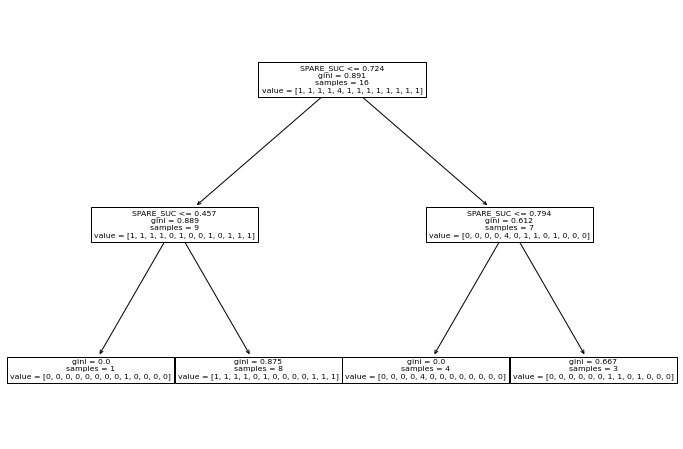

In [135]:
plt.figure(figsize=(12,8))
tree.plot_tree(bowling_m_tree, feature_names=X.columns);

In [136]:
#depth 수정 (2 > 5)

bowling_m_tree=DecisionTreeClassifier(max_depth=5, random_state=13)
bowling_m_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=13)

In [141]:
y_pred_tr = bowling_m_tree.predict(X_train)
y_pred_test = bowling_m_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test)) 

0.75
0.0


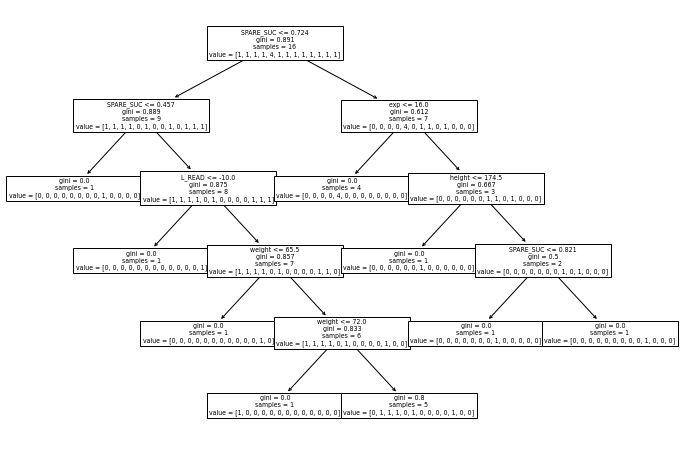

In [142]:
plt.figure(figsize=(12,8))
tree.plot_tree(bowling_m_tree, feature_names=X.columns);

In [ ]:
# 피처를 만들어낸 특성들만 선택하는 경우?

In [159]:
X=bowling_m_2[['CON_ST','L_READ','OVERCOME']] #피쳐
y=bowling_m_2['TOT_AVG'] #라벨

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

#라벨이 int 
y_train = y_train.apply(lambda x : round(x)) 
y_test = y_test.apply(lambda x : round(x)) 

In [160]:
#fit
bowling_m_tree=DecisionTreeClassifier(max_depth=5, random_state=13)
bowling_m_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=13)

In [161]:
y_pred_tr = bowling_m_tree.predict(X_train)
y_pred_test = bowling_m_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test)) 

0.625
0.0


In [162]:
pred = bowling_m_tree.predict(X_test)
print(accuracy_score(y_test, pred))

0.0


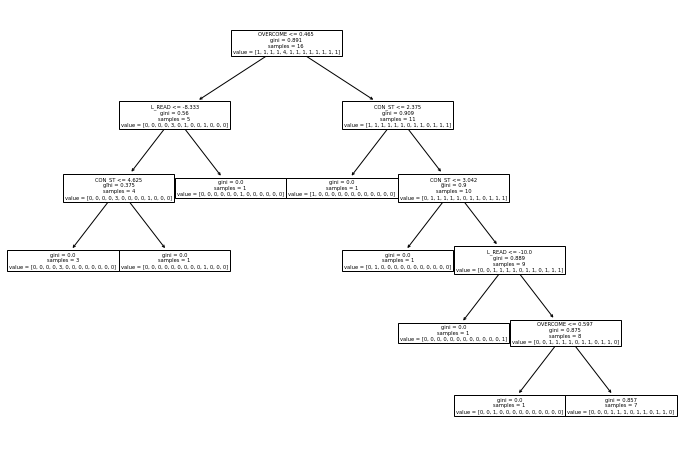

In [163]:
plt.figure(figsize=(12,8))
tree.plot_tree(bowling_m_tree, feature_names=X.columns);

---

## 4. 피처분석

---

아하 회귀가 아닌 분류로 접근중.
다시 회귀 분석으로 수정

---

In [195]:
bowling_m_2.head()

,height,exp,pro_exp,weight,ball_pound,TOT_AVG,CON_ST,L_READ,OVERCOME,SPARE_SUC,throws_num,team_num,hand_num
0,180,23,3,60,15.0,215.8,4.40,-9.000000,0.652252,0.811789,2,2,1
1,173,22,3,79,15.0,246.0,5.75,-9.750000,0.687281,0.659609,1,13,0
2,179,13,4,130,15.0,190.5,2.75,-9.250000,0.475010,0.542429,2,10,0
3,175,10,8,72,15.0,212.5,4.00,-8.750000,0.455561,0.768218,1,12,0
4,167,31,6,70,15.0,172.0,2.00,-8.666667,0.688754,0.467551,1,0,1


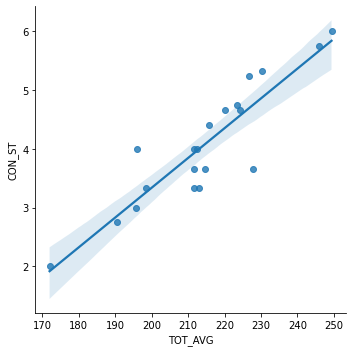

In [165]:
# 상관관계 확인
sns.lmplot(x='TOT_AVG', y= 'CON_ST', data=bowling_m);

In [197]:
#우선 모든 피쳐들과 함께 확인
# train / test 데이터 분리

X = bowling_m_2.drop(['TOT_AVG'],axis=1)
y = bowling_m_2['TOT_AVG']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

In [198]:
X_train.head()

,height,exp,pro_exp,weight,ball_pound,CON_ST,L_READ,OVERCOME,SPARE_SUC,throws_num,team_num,hand_num
8,172,28,3,70,15.0,4.666667,-9.000000,0.690137,0.446473,1,10,0
5,174,26,10,74,15.0,3.333333,-8.666667,0.783212,0.624562,2,3,0
7,178,27,19,78,15.0,4.666667,-8.333333,0.777611,0.819693,2,6,1
15,174,18,4,65,15.0,3.666667,-8.000000,0.361171,0.794774,1,7,0
14,182,12,9,80,15.0,3.333333,-9.666667,0.722074,0.739415,3,14,0


In [199]:
#회귀분석 계수 학습 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [200]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [201]:
print(lr.coef_,  lr.intercept_) #각 피쳐의 계수, 절편


[ 2.19744578e+00  3.33508110e-01 -2.77806376e+00 -6.75017573e-03
 -1.24370570e+01  1.78647495e+01 -1.44553989e+01  4.86610783e+01
  9.55559518e+01 -1.23974254e+01 -1.29500291e+00  1.30762169e+00] -230.31340589039365


In [202]:
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TOT_AVG   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     33.20
Date:                Tue, 10 May 2022   Prob (F-statistic):            0.00741
Time:                        19:02:34   Log-Likelihood:                -29.330
No. Observations:                  16   AIC:                             84.66
Df Residuals:                       3   BIC:                             94.70
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -230.3134    163.995     -1.404      0.255    -752.217     291.591
height         2.1974      0.710      3.096      0.053      -0.061       4.456
exp            0.3335      0.245      1.359      0.267      -0.447       1.114
pro_exp       -2.7781      0.584     -4.753      0.018      -4.638      -0.918
weight        -0.0068      0.093     -0.072      0.947      -0.304       0.291
ball_pound   -12.4371      9.633     -1.291      0.287     -43.095      18.221
CON_ST        17.8647      1.947      9.176      0.003      11.669      24.061
L_READ       -14.4554      4.231     -3.417      0.042     -27.919      -0.991
OVERCOME      48.6611      8.679      5.607      0.011      21.041      76.281
SPARE_SUC     95.5560     18.139      5.268      0.013      37.829     153.283
throws_num   -12.3974      4.470     -2.774      0.069     -26.622       1.827
team_num      -1.2950      0.575     -2.251      0.110      -3.126       0.536
hand_num       1.3076      3.397      0.385      0.726      -9.503      12.118
==============================================================================
Omnibus:                        8.500   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                1.876
Skew:                          -0.225   Prob(JB):                        0.391
Kurtosis:                       1.384   Cond. No.                     3.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 - P>|t|  0.05이하
    - CON_ST : 0.003
    - OVERCOME	: 0.011
    - SPARE_SUC :	0.013
    - pro_exp : 0.018
    - L_READ :	0.042
---

 >> 스트라이크 입력값으로 새롭게 생성한 피처(CON_ST, OVERCOME, SPARE_SUC, L_READ)들이 유의미한 피처로 사용 가능.  
 
 >> 선수 특성인 pro_exp의 p-value도 낮아서 놀라움
.

[Text(0, 0, 'const'),
 Text(1, 0, 'height'),
 Text(2, 0, 'exp'),
 Text(3, 0, 'pro_exp'),
 Text(4, 0, 'weight'),
 Text(5, 0, 'ball_pound'),
 Text(6, 0, 'CON_ST'),
 Text(7, 0, 'L_READ'),
 Text(8, 0, 'OVERCOME'),
 Text(9, 0, 'SPARE_SUC'),
 Text(10, 0, 'throws_num'),
 Text(11, 0, 'team_num'),
 Text(12, 0, 'hand_num')]

C:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


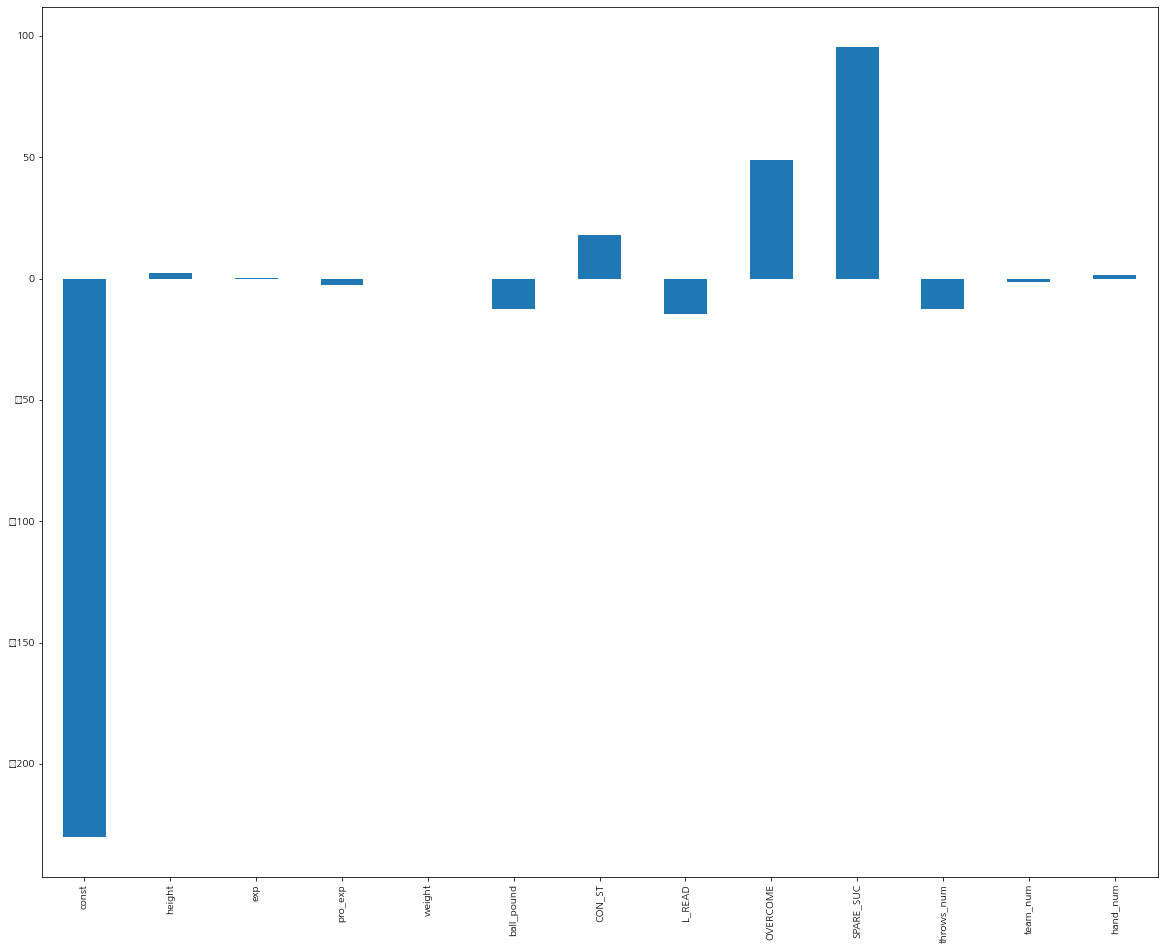

In [229]:
#회귀계수를 그래프로 표현

coefs=model.params.tolist()
coefs_series = pd.Series(coefs)

X_labels=model.params.index.tolist()


ax= coefs_series.plot(kind='bar');
ax.set_xticklabels(X_labels)

[Text(0, 0, 'height'),
 Text(1, 0, 'exp'),
 Text(2, 0, 'pro_exp'),
 Text(3, 0, 'weight'),
 Text(4, 0, 'ball_pound'),
 Text(5, 0, 'CON_ST'),
 Text(6, 0, 'L_READ'),
 Text(7, 0, 'OVERCOME'),
 Text(8, 0, 'SPARE_SUC'),
 Text(9, 0, 'throws_num'),
 Text(10, 0, 'team_num'),
 Text(11, 0, 'hand_num')]

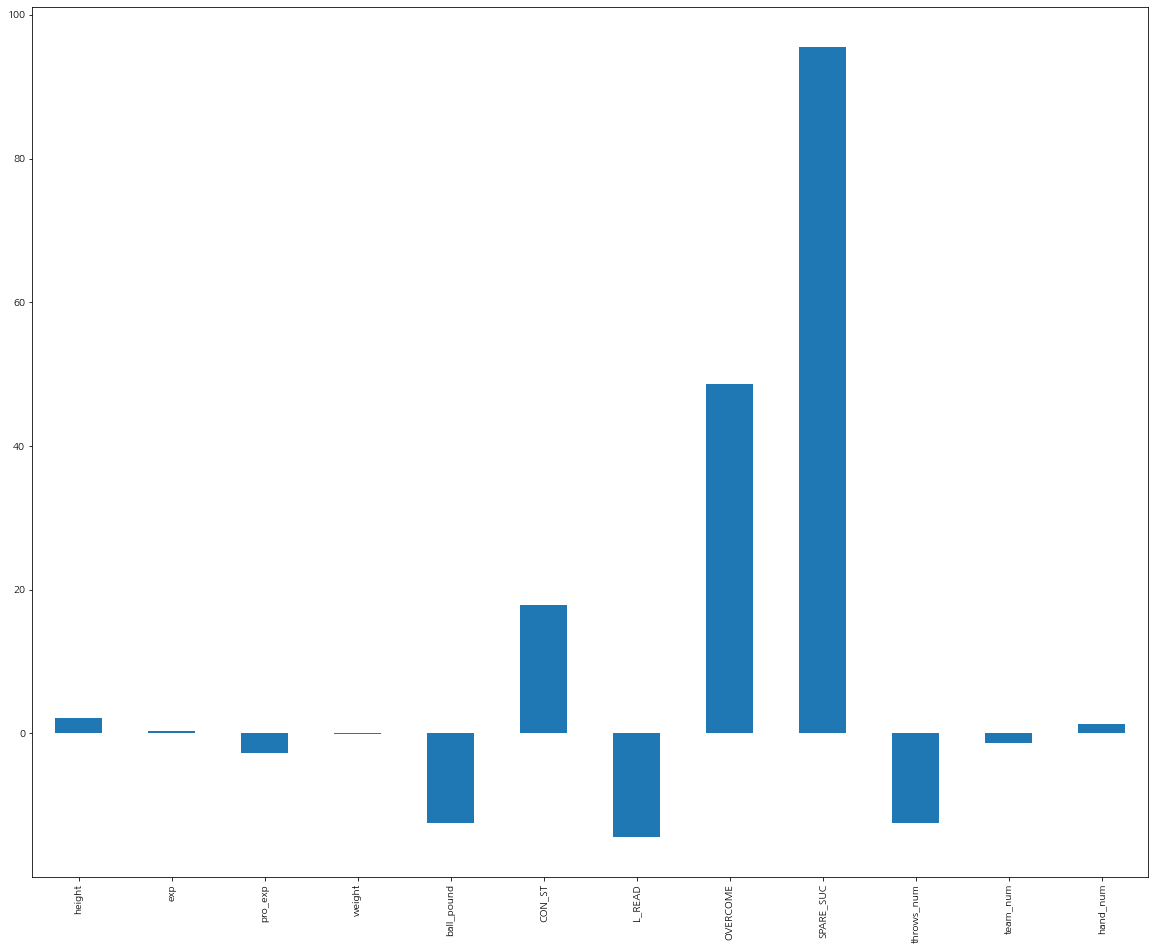

In [230]:

coefs=model.params.tolist()
coefs_series = pd.Series(coefs[1:])

X_labels=model.params.index.tolist()


ax= coefs_series.plot(kind='bar')
ax.set_xticklabels(X_labels[1:])


 - 피처의 영향력 크기
    - SPARE_SUC
    - OVERCOME
    - CON_ST
    - L_READ  
  
>> 


 - const는 뭐지??
---

 >> 스트라이크 입력값으로 새롭게 생성한 피처( SPARE_SUC , OVERCOME, CON_ST, L_READ )들이 영향력이 큼 
     
 >> 유의미 순 : CON_ST, OVERCOME, SPARE_SUC, L_READ  
 >> 영향력 순 : SPARE_SUC , OVERCOME, CON_ST, L_READ  


 >>

    - 분석에서 4개의 특성만 사용해도 되지않을까?


In [209]:
bowling_m_2.head()

,height,exp,pro_exp,weight,ball_pound,TOT_AVG,CON_ST,L_READ,OVERCOME,SPARE_SUC,throws_num,team_num,hand_num
0,180,23,3,60,15.0,215.8,4.40,-9.000000,0.652252,0.811789,2,2,1
1,173,22,3,79,15.0,246.0,5.75,-9.750000,0.687281,0.659609,1,13,0
2,179,13,4,130,15.0,190.5,2.75,-9.250000,0.475010,0.542429,2,10,0
3,175,10,8,72,15.0,212.5,4.00,-8.750000,0.455561,0.768218,1,12,0
4,167,31,6,70,15.0,172.0,2.00,-8.666667,0.688754,0.467551,1,0,1


In [220]:
bowling_m_3=bowling_m_2[['TOT_AVG','CON_ST','L_READ','OVERCOME','SPARE_SUC']]

In [222]:
bowling_m_3.head()

,TOT_AVG,CON_ST,L_READ,OVERCOME,SPARE_SUC
0,215.8,4.40,-9.000000,0.652252,0.811789
1,246.0,5.75,-9.750000,0.687281,0.659609
2,190.5,2.75,-9.250000,0.475010,0.542429
3,212.5,4.00,-8.750000,0.455561,0.768218
4,172.0,2.00,-8.666667,0.688754,0.467551


---  

 > 궁금 ?  
 
    pairplot 결과는 CON_ST만 상관관계가 있어 보였는데 회귀 계수의 크기는 왜 다른 피처가 더 높은가?  
    
plt.figure(figsize=(12,6))
sns.pairplot(data=bowling_m);

sns.lmplot(x='TOT_AVG', y= 'CON_ST', data=bowling_m);  


    const는 뭐지? 

---

In [240]:

X = bowling_m_3.drop('TOT_AVG',axis=1)
y = bowling_m_3['TOT_AVG']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

## 5.통계적 회귀  

 - 상관관계가 높은 CON_ST , 회귀계수가 큰 SPARE_SUC 각각 진행해보기

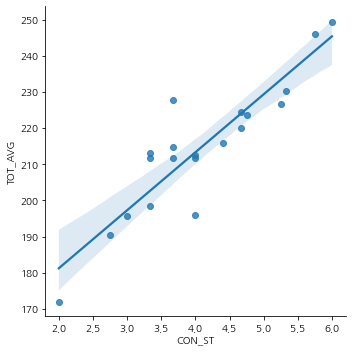

In [250]:
#CON_ST

sns.lmplot(x='CON_ST', y='TOT_AVG', data=bowling_m_3)

In [253]:
X = bowling_m_3['CON_ST']
y = bowling_m_3['TOT_AVG']

lm=sm.OLS(y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                TOT_AVG   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              643.7
Date:                Tue, 10 May 2022   Prob (F-statistic):                    4.05e-16
Time:                        21:41:22   Log-Likelihood:                         -100.30
No. Observations:                  20   AIC:                                      202.6
Df Residuals:                      19   BIC:                                      203.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CON_ST        50.5264      1.991     25.372      0.000      46.358      54.694
==============================================================================
Omnibus:                        2.219   Durbin-Watson:                   2.331
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                1.120
Skew:                          -0.143   Prob(JB):                        0.571
Kurtosis:                       1.877   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

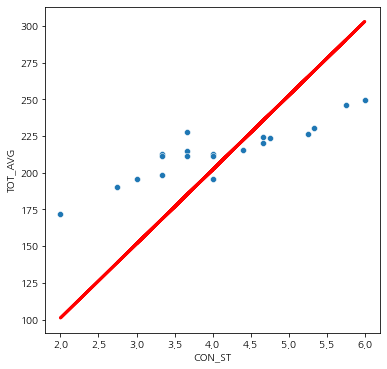

In [263]:
pred=lm.predict(X)

plt.figure(figsize=(6,6))
sns.scatterplot(x=X, y=y)
plt.plot(X, pred, 'r', lw=3);

In [ ]:
#상수항이 없어서 > 다시 수정해야

In [235]:
#회귀모델 평가하기 (R2 score)

X = bowling_m_3.drop('TOT_AVG',axis=1)
y = bowling_m_3['TOT_AVG']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)


In [239]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [237]:
print('Train R2 score',model.score(X_train, y_train))
print('Test R2 score',model.score(X_test, y_test))

AttributeError: 'OLSResults' object has no attribute 'score'

## 여성부

In [37]:
# name=[]
# for idx, dataset in bowling.iterrows():
#     if dataset['COL1'] != 'nan':
#         name.append(dataset['COL1'])

# print(len(name))

127


In [40]:
# name=[]
# for i in name[:]:
#     if type(i) != str:
#         name.remove(i)
# print(name)
# name=name[1:]

['이름', '양은숙', '김효미', '정해원', '이선진', '김유미', '이미진13A', '한진아14', '전성화', '김민선', '최현숙', '김양희', '안정원', '김영숙', '여수현', '정희선', '오승이', '임가혜', '유성희', '임가현', '유혜련', '염혜경', '임현옥', '정해원', '윤희여', '오승이', '염혜경', '임가혜', '김유미', '이선진', '유현이', '김푸른', '이영미', '김민선', '정호정', '차미정', '안정원', '한진아14', '차하영', '전성화', '최현숙', '김양희', '김연주', '정희선', '지은솔', '김영숙', '임현옥', '윤희여', '김아름', '임가현', '유혜련', '유현이', '김푸른', '이영미', '차하영', '정호정', '차미정', '김연주', '김은옥', '지은솔', '김유민', '오명진', '한윤아', '염혜경', '정해원', '김영숙', '여수현', '오승이', '임가혜', '이미진13A', '안정원', '임가현', '유혜련', '차하영', '양은숙', '김효미', '이미진13A', '한윤아', '오명진', '김아름', '김영숙', '여수현', '차미정', '정호정', '유성희', '김유민', '한진아14', '전성화', '한진아14', '전성화', '정해원', '최현숙', '김양희', '이미진13A', '양은숙', '정희선', '김효미', '유성희', '김유미', '이선진', '김민선', '김영숙', '여수현', '안정원', '오승이', '임가혜']


In [6]:
name_list=[]
for i in bowling['이름']:
    name_list.append(i)

name_list.sort()
print(name_list)

['김민선', '김민선', '김아름', '김아름', '김양희', '김연주', '김영숙', '김영숙', '김영숙', '김영숙', '김영숙', '김유미', '김유민', '김유민', '김은옥', '김효미', '김효미', '안정원', '안정원', '안정원', '양은숙', '양은숙', '여수현', '여수현', '여수현', '염혜경', '염혜경', '오명진', '오명진', '오승이', '오승이', '오승이', '유성희', '유성희', '유현이', '유혜련', '유혜련', '유혜련', '윤희여', '이미진13A', '이선진', '임가현', '임가현', '임가혜', '임가혜', '임현옥', '전성화', '전성화', '전성화', '정해원', '정해원', '정해원', '정호정', '정호정', '정희선', '정희선', '정희선', '지은솔', '지은솔', '차미정', '차미정', '차하영', '최현숙', '한윤아', '한진아14', '한진아14', '한진아14', '한진아14']


In [21]:
print(len(name_list), len(set(name_list)))

68 34


In [18]:
count=[]
name_set=set(name_list)
for i in name_set:
    count.append({i :name_list.count(i)})

print(count)

[{'임가현': 2}, {'차하영': 1}, {'김연주': 1}, {'윤희여': 1}, {'김은옥': 1}, {'김효미': 2}, {'임현옥': 1}, {'오승이': 3}, {'김아름': 2}, {'오명진': 2}, {'김영숙': 5}, {'정해원': 3}, {'최현숙': 1}, {'정희선': 3}, {'김양희': 1}, {'유현이': 1}, {'한윤아': 1}, {'염혜경': 2}, {'전성화': 3}, {'지은솔': 2}, {'이선진': 1}, {'유혜련': 3}, {'김유미': 1}, {'정호정': 2}, {'임가혜': 2}, {'유성희': 2}, {'김유민': 2}, {'이미진13A': 1}, {'김민선': 2}, {'한진아14': 4}, {'안정원': 3}, {'양은숙': 2}, {'차미정': 2}, {'여수현': 3}]


In [19]:
count2=[]
name_set=set(name_list)
for i in name_set:
    count2.append(name_list.count(i))

print(count2)

[2, 1, 1, 1, 1, 2, 1, 3, 2, 2, 5, 3, 1, 3, 1, 1, 1, 2, 3, 2, 1, 3, 1, 2, 2, 2, 2, 1, 2, 4, 3, 2, 2, 3]


In [20]:
print(sum(count2)/len(count2))

2.0
